In [1]:
import rl_ctrl_sat_aw
from scipy.integrate import ode
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

## Instantiate system

In [3]:
o = rl_ctrl_sat_aw.rl_ctrl_sat_aw_class()

## Solve steady state

In [6]:
events = [{'t_end':1.0,'i_ref':0.0},
          {'t_end':5.0,'i_ref':1.0}]
T,X,Y,Z =o.simulate(events)

In [5]:
%timeit o.simulate(events)

44.6 ms ± 5.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
#import Pool
from multiprocessing import Pool
#Define a worker — a function which will be executed in parallel
def worker(x):
    return x*x
#Assuming you want to use 3 processors
num_processors = 3
#Create a pool of processors
p=Pool(processes = num_processors)
#get them to work in parallel
output = p.map(worker,[i for i in range(0,3)])
print(output)


## Run multiple simulations

In [15]:
o = rl_ctrl_sat_aw.rl_ctrl_sat_aw_class()
o.Dt = 0.001
o.t_end = 5.0
o.decimation = 10
o.update()

o.struct.V_max = 1

o.struct.i_ref = 0
sol = optimize.root(o.run_problem, [1]*(o.N_x+o.N_y), jac=o.dae_jacobian, method='hybr')
o.struct.K_aw = 1.0
x_0 = np.copy(o.struct.x)
y_0 = np.copy(o.struct.y)

def sim_iref(o,i_ref):
    
    o.struct.x = np.copy(x_0)
    o.struct.y = np.copy(y_0)
    
    o.struct[0].itol = 1e-6
    o.struct.it_store = 0
    o.struct.t = 0.0
    
    o.struct.i_ref = 0.0
    o.struct.t_end = 0.5
    t = rl_ctrl_sat_aw.daesolver(o.struct)

    o.struct.i_ref = i_ref
    o.struct.t_end = 2.0
    t = rl_ctrl_sat_aw.daesolver(o.struct)
    
    T = o.struct[0]['T'][:o.struct[0].it_store]
    X = o.struct[0].X[:o.struct[0].it_store,:]
    Y = o.struct[0].Y[:o.struct[0].it_store,:]
    Z = o.struct[0].Z[:o.struct[0].it_store,:]
    Iters = o.struct[0].iters[:o.struct[0].it_store,:]    
    return T,X,Y,Z,Iters

<IPython.core.display.Javascript object>


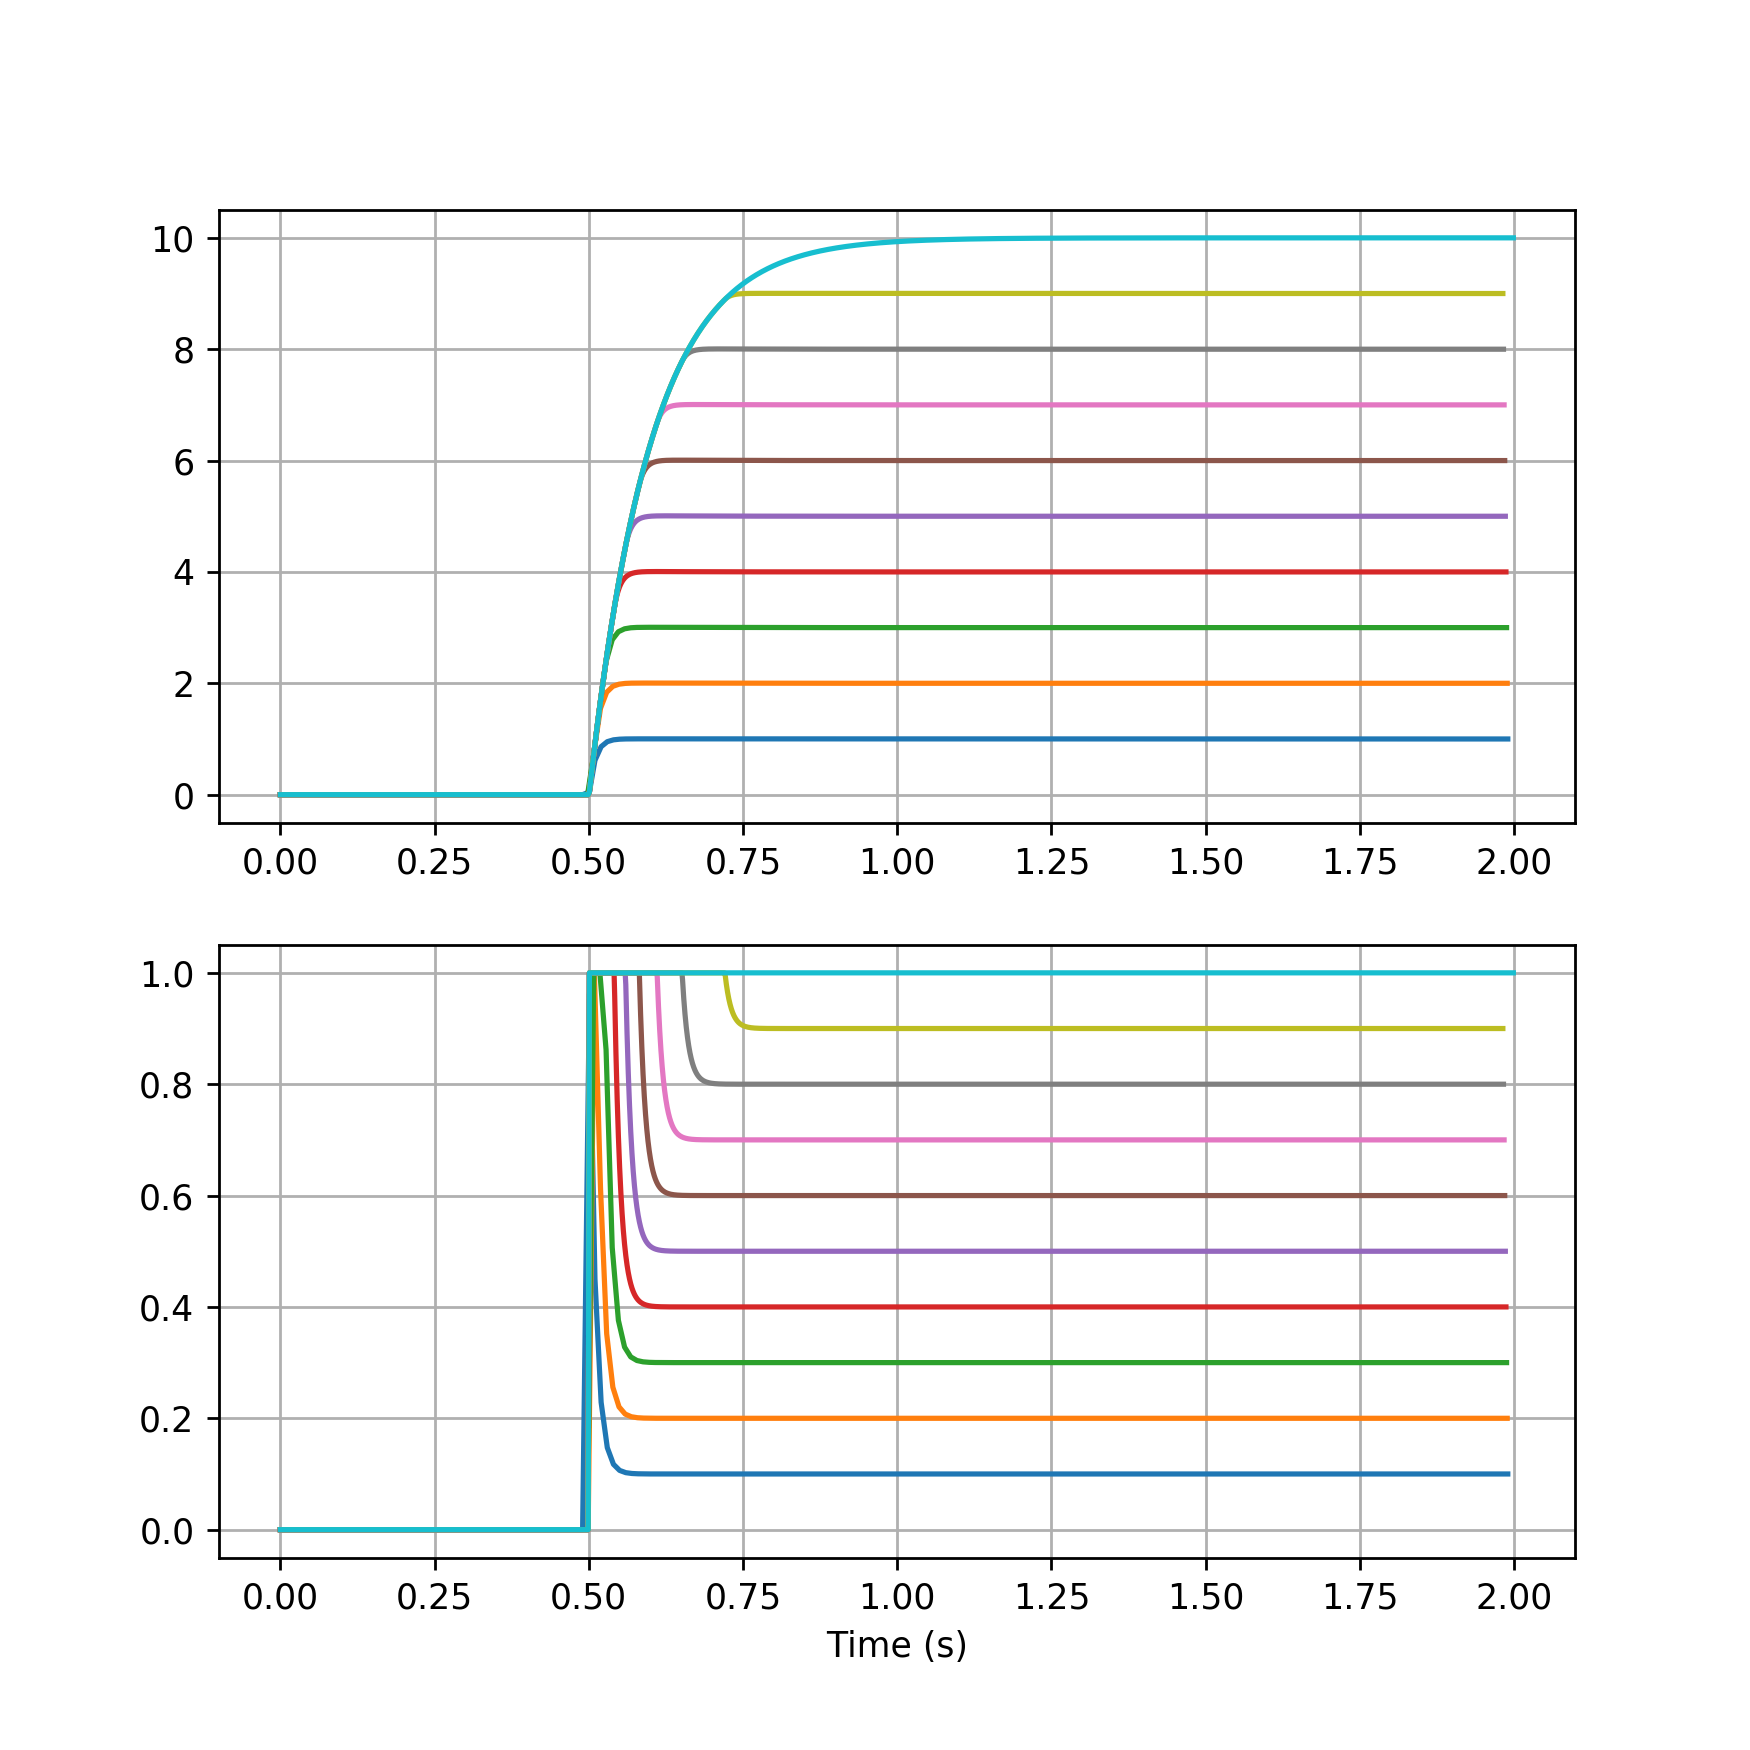

Text(0.5, 0, 'Time (s)')

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
for i_ref in np.arange(1,11):
    T,X,Y,Z,Iters = sim_iref(o,i_ref)
    axes[0].plot(T,X[:,0])
    axes[1].plot(T,Z[:,0])

for ax in axes:
    ax.grid()
    #ax.legend()
ax.set_xlabel('Time (s)')
